In [27]:
import os
import pandas as pd
from pathlib import Path
import json
import matplotlib.pyplot as plt

#### Datasets List 

- **FinQABench**: Focuses on testing AI models' ability to answer Search Queries over 10-K Reports with accuracy, evaluating the system's ability to detect hallucinations and ensure factual correctness in generated answers.
- **FinanceBench**: Uses Natural Queries to retrieve relevant information from public filings like 10-K and Annual Reports. The aim is to evaluate how well systems handle straightforward, real-world financial questions.
- **TATQA**: Requires participants to answer Natural Queries that involve numerical reasoning over hybrid data, which combines tables and text from Financial Reports. Tasks include basic arithmetic, comparisons, and logical reasoning.
- **MultiHiertt**: Focuses on Multi-Hop Queries, requiring participants to retrieve and reason over hierarchical tables and unstructured text from Annual Reports, making this one of the more complex reasoning tasks involving multiple steps across various document sections.

In [3]:
data_dir = Path.cwd().parent / 'data'
os.listdir(data_dir)

['convfinqa_queries.jsonl',
 'ConvFinQA_qrels.tsv',
 'FinanceBench_qrels.tsv',
 'FinDER_qrels.tsv',
 'TATQA_qrels.tsv',
 'finqabench_corpus.jsonl',
 'finder_corpus.jsonl',
 'tatqa_corpus.jsonl',
 'tatqa_queries.jsonl',
 'multiheirtt_corpus.jsonl',
 'convfinqa_corpus.jsonl',
 'finqa_queries.jsonl',
 'multiheirtt_queries.jsonl',
 'finqa_corpus.jsonl',
 'financebench_queries.jsonl',
 'FinQA_qrels.tsv',
 'FinQABench_qrels.tsv',
 'sample_submission_.csv',
 'MultiHeirtt_qrels.tsv',
 'finder_queries.jsonl',
 'financebench_corpus.jsonl',
 'finqabench_queries.jsonl']

#### FinQABench

In [6]:
finqa_bench_corpus_path = data_dir / 'finqabench_corpus.jsonl/corpus.jsonl'
finqa_bench_query_path = data_dir / 'finqabench_queries.jsonl/queries.jsonl'
finqa_bench_tsv_path = data_dir / 'FinQABench_qrels.tsv'

In [42]:
finqa_bench_corpus = pd.read_json(finqa_bench_corpus_path, lines=True)
print("Total Documents in FinQA Bench Dataset :", finqa_bench_corpus.shape[0])
finqa_bench_corpus.head()

Total Documents in FinQA Bench Dataset : 92


,_id,title,text
0,d4aa0660c,,Apple Inc.\nCONSOLIDATED STATEMENTS OF OPERATI...
1,d4aa04834,,to \ncover all losses or all types of claims ...
2,d4aa01288,,The Company’s operations are also subject to t...
3,d4aa0a270,,"such election by written consent, other than ..."
4,d4aa09b4a,,"rant, dated as of August 20, 2020, including \..."


In [47]:
# Add Sequence Len to the corpuse
finqa_bench_corpus['seq_len'] = finqa_bench_corpus['text'].apply(lambda x : len(x.split(' ')))

Text(0.5, 1.0, 'Distribution of Seq Length for FinQA Bench Corpus Dataset')

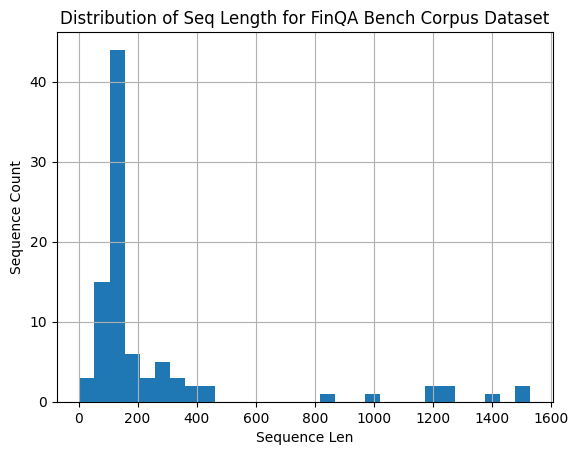

In [48]:
finqa_bench_corpus['seq_len'].hist(bins=30)
plt.xlabel("Sequence Len")
plt.ylabel("Sequence Count")
plt.title("Distribution of Seq Length for FinQA Bench Corpus Dataset")

In [40]:
for title in finqa_bench_corpus.title.tolist():
    if len(title) > 0:
        print(title)

In [43]:
finqa_bench_query = pd.read_json(finqa_bench_query_path, lines=True)
print("Total Queries in FinQA Bench Dataste:", finqa_bench_query.shape[0])
finqa_bench_query.head()

Total Queries in FinQA Bench Dataste: 100


,_id,title,text
0,q4aa0b116,,What is the redemption price for the 0.875% 20...
1,q4aa0a48c,,What is the maturity date of the 0.875% 2025 N...
2,q4aa0aeb4,,What are the conditions under which the Compan...
3,q4aa05fa4,,What is the Company's investment policy and st...
4,q4aa092f8,,What is the purpose of the Company's internal ...


In [44]:
finqa_bench_query['seq_len'] = finqa_bench_query['text'].apply(lambda x : len(x.split(' ')))

Text(0.5, 1.0, 'Distribution of Seq Length for FinQA Bench Query Dataset')

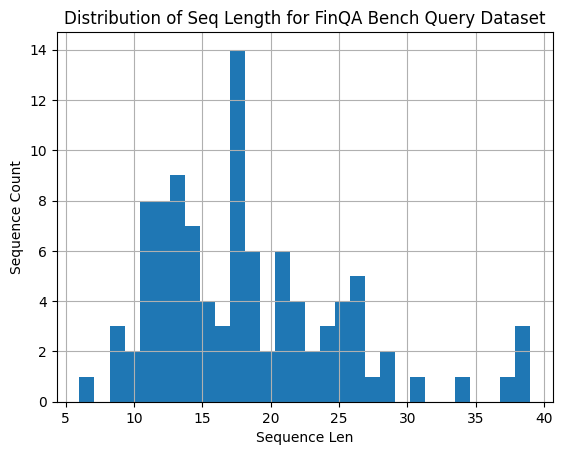

In [49]:
finqa_bench_query['seq_len'].hist(bins=30)
plt.xlabel("Sequence Len")
plt.ylabel("Sequence Count")
plt.title("Distribution of Seq Length for FinQA Bench Query Dataset")

In [50]:
finqa_bench_gt = pd.read_csv(finqa_bench_tsv_path, sep='\t')
print("Number of Ground Truth Data in FinQA Bench Dataset:", finqa_bench_gt.shape[0])
finqa_bench_gt.head()

Number of Ground Truth Data in FinQA Bench Dataset: 30


,query_id,corpus_id,score
0,q4a9ffea6,d4a9fff3c,1
1,q4aa001f8,d4aa00266,1
2,q4aa013c8,d4aa01440,1
3,q4aa01b02,d4aa01b7a,1
4,q4aa01e4a,d4aa01ecc,1


In [52]:
unique_queries = finqa_bench_gt.query_id.unique()
print("Number of Unique Queries:", unique_queries.shape[0])

Number of Unique Queries: 30


#### Finance Bench

In [53]:
finance_bench_corpus_path = data_dir / 'financebench_corpus.jsonl/corpus.jsonl'
finance_bench_query_path = data_dir / 'financebench_queries.jsonl/queries.jsonl'
finance_bench_tsv_path = data_dir / 'FinanceBench_qrels.tsv'

In [54]:
finance_bench_corpus = pd.read_json(finance_bench_corpus_path, lines=True)
print("Total Documents in Finance Bench Dataset :", finance_bench_corpus.shape[0])
finance_bench_corpus.head()

Total Documents in Finance Bench Dataset : 180


,_id,title,text
0,dd2af2336,PEPSICO_2022_10K,"6) Africa, Middle East and South Asia (AMESA),..."
1,dd2acf5c0,BOEING_2022_10K,We derive a significant portion of our revenue...
2,dd2ad12e4,COCACOLA_2022_10K,THE COCA-COLA COMPANY AND SUBSIDIARIES\nCONSOL...
3,dd2af3272,PEPSICO_2022_10K,Note 3 Restructuring and Impairment Charges\n2...
4,dd2ade412,LOCKHEEDMARTIN_2020_10K,Table of Contents\nLockheed Martin Corporation...


In [75]:
print(finance_bench_corpus.text.tolist()[1])

We derive a significant portion of our revenues from a limited number of commercial airlines.


In [55]:
# Add Sequence Len to the corpuse
finance_bench_corpus['seq_len'] = finance_bench_corpus['text'].apply(lambda x : len(x.split(' ')))
finance_bench_corpus.head()

,_id,title,text,seq_len
0,dd2af2336,PEPSICO_2022_10K,"6) Africa, Middle East and South Asia (AMESA),...",55
1,dd2acf5c0,BOEING_2022_10K,We derive a significant portion of our revenue...,15
2,dd2ad12e4,COCACOLA_2022_10K,THE COCA-COLA COMPANY AND SUBSIDIARIES\nCONSOL...,270
3,dd2af3272,PEPSICO_2022_10K,Note 3 Restructuring and Impairment Charges\n2...,216
4,dd2ade412,LOCKHEEDMARTIN_2020_10K,Table of Contents\nLockheed Martin Corporation...,150


Text(0.5, 1.0, 'Distribution of Seq Length for Finance Bench Corpus Dataset')

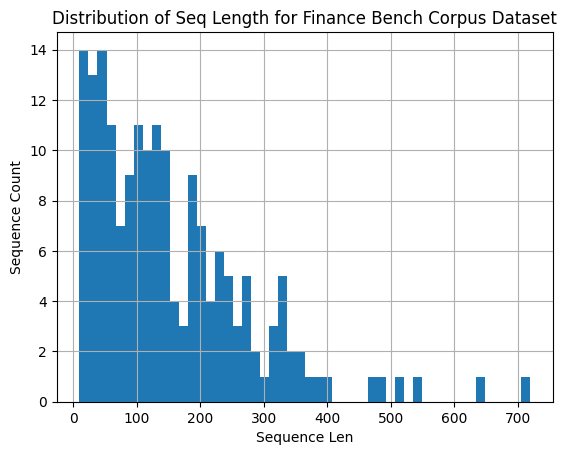

In [57]:
finance_bench_corpus['seq_len'].hist(bins=50)
plt.xlabel("Sequence Len")
plt.ylabel("Sequence Count")
plt.title("Distribution of Seq Length for Finance Bench Corpus Dataset")

In [58]:
finance_bench_query = pd.read_json(finance_bench_query_path, lines=True)
print("Total Queries in Finance Bench Dataste:", finance_bench_query.shape[0])
finance_bench_query.head()

Total Queries in Finance Bench Dataste: 150


,_id,title,text
0,qd2ac917a,,What is the FY2019 - FY2020 total revenue grow...
1,qd2aeff00,,Does Paypal have positive working capital base...
2,qd2acfe6c,,How does Boeing's effective tax rate in FY2022...
3,qd2ad28d8,,Using only the information within the balance ...
4,qd2ac61e6,,"Among operations, investing, and financing act..."


Text(0.5, 1.0, 'Distribution of Seq Length for Finance Bench Query Dataset')

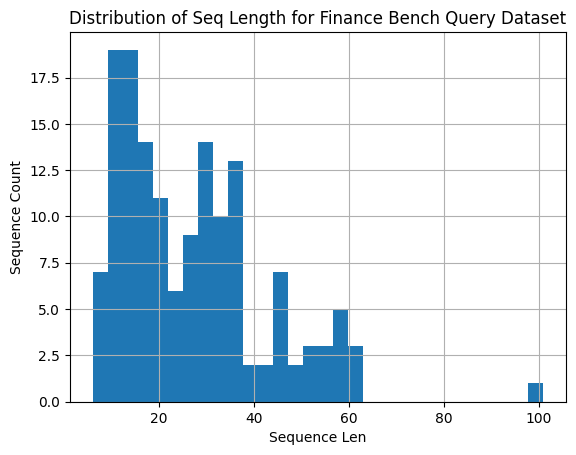

In [60]:
finance_bench_query['seq_len'] = finance_bench_query['text'].apply(lambda x : len(x.split(' ')))
finance_bench_query['seq_len'].hist(bins=30)
plt.xlabel("Sequence Len")
plt.ylabel("Sequence Count")
plt.title("Distribution of Seq Length for Finance Bench Query Dataset")

In [62]:
finance_bench_gt = pd.read_csv(finance_bench_tsv_path, sep='\t')
print("Number of Ground Truth Data in FinQA Bench Dataset:", finance_bench_gt.shape[0])
unique_queries = finance_bench_gt.query_id.unique()
print("Number of Unique Queries:", unique_queries.shape[0])
finance_bench_gt.head()

Number of Ground Truth Data in FinQA Bench Dataset: 59
Number of Unique Queries: 45


,query_id,corpus_id,score
0,qd2abb7e6,dd2abb8b8,1
1,qd2abd0e6,dd2abd17c,1
2,qd2abd0e6,dd2abd1e0,1
3,qd2abd6b8,dd2abd1e0,1
4,qd2abd6b8,dd2abd7b2,1


#### TATQA

In [65]:
tatqa_corpus_path = data_dir / 'tatqa_corpus.jsonl/corpus.jsonl'
tatqa_query_path = data_dir / 'tatqa_queries.jsonl/queries.jsonl'
tatqa_tsv_path = data_dir / 'TATQA_qrels.tsv'

In [66]:
tatqa_corpus = pd.read_json(tatqa_corpus_path, lines=True)
print("Total Documents in TATQA Dataset :", tatqa_corpus.shape[0])
tatqa_corpus.head()

Total Documents in TATQA Dataset : 2756


,_id,title,text
0,d1b2e74c0,,The following tables present the recorded inve...
1,d1b32cade,,NOTE 13. INCOME TAXES\nWe calculate our provis...
2,d1b38504e,,8. Earnings Per Share\nBasic earnings per shar...
3,d1b37e6a4,,AMERICAN TOWER CORPORATION AND SUBSIDIARIES NO...
4,d1b3a8e2c,,The tax effects of temporary differences that ...


Text(0.5, 1.0, 'Distribution of Seq Length for TATQA Corpus Dataset')

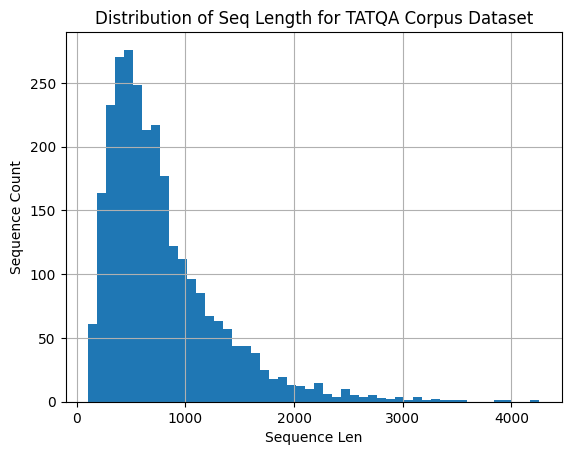

In [70]:
# Add Sequence Len to the corpuse
# NEED TO HANDLE TABULAR DATA DIFFERENTLY
tatqa_corpus['seq_len'] = tatqa_corpus['text'].apply(lambda x : len(x.split(' ')))

tatqa_corpus['seq_len'].hist(bins=50)
plt.xlabel("Sequence Len")
plt.ylabel("Sequence Count")
plt.title("Distribution of Seq Length for TATQA Corpus Dataset")

In [71]:
tatqa_query = pd.read_json(tatqa_query_path, lines=True)
print("Total Queries in Finance Bench Dataste:", tatqa_query.shape[0])
tatqa_query.head()

Total Queries in Finance Bench Dataste: 1663


,_id,title,text
0,q1a73c1d4,,In which year was interest income greater than...
1,q1a72ef98,,What was the Net Income (Loss) in 2019?
2,q1a716380,,What was the percentage of Plan Assets for Oth...
3,q1a73f97e,,What was the service revenue from Americas in ...
4,q1a731ee6,,What was the Customer support renewal rate for...


Text(0.5, 1.0, 'Distribution of Seq Length for TATQA Query Dataset')

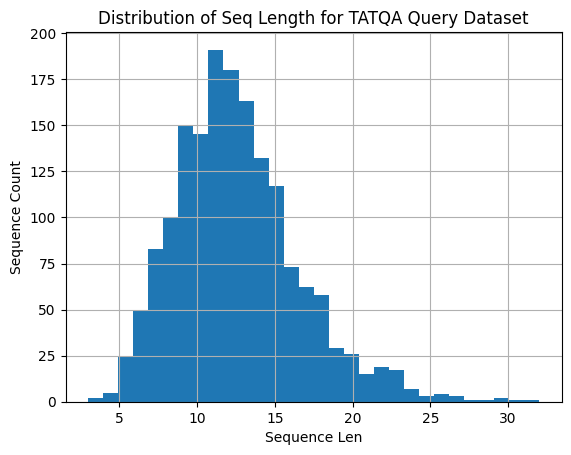

In [72]:
tatqa_query['seq_len'] = tatqa_query['text'].apply(lambda x : len(x.split(' ')))
tatqa_query['seq_len'].hist(bins=30)
plt.xlabel("Sequence Len")
plt.ylabel("Sequence Count")
plt.title("Distribution of Seq Length for TATQA Query Dataset")

In [73]:
tatqa_gt = pd.read_csv(tatqa_tsv_path, sep='\t')
print("Number of Ground Truth Data in TATQA Bench Dataset:", tatqa_gt.shape[0])
unique_queries = tatqa_gt.query_id.unique()
print("Number of Unique Queries:", unique_queries.shape[0])
tatqa_gt.head()

Number of Ground Truth Data in TATQA Bench Dataset: 498
Number of Unique Queries: 498


,query_id,corpus_id,score
0,q1a711272,d1a711510,1
1,q1a711416,d1a711510,1
2,q1a71177c,d1a7118d0,1
3,q1a711812,d1a7118d0,1
4,q1a711b3c,d1a711c7c,1


#### MultiHiertt

In [76]:
multih_corpus_path = data_dir / 'multiheirtt_corpus.jsonl/corpus.jsonl'
multih_query_path = data_dir / 'multiheirtt_queries.jsonl/queries.jsonl'
multih_tsv_path = data_dir / 'MultiHeirtt_qrels.tsv'

In [78]:
multih_corpus = pd.read_json(multih_corpus_path, lines=True)
print("Total Documents in MULTIH Dataset :", multih_corpus.shape[0])
multih_corpus.head()

Total Documents in MULTIH Dataset : 10475


,_id,title,text
0,d8e4ea4ac,,"| | Years Ended December 31, |\n| | 2006 | 2..."
1,d8d3b0d4e,,Upon the termination of a participants emplo...
2,d89382114,,Note 6—Mergers and Acquisitions ElderTrust Mer...
3,d8d151e68,,"c) In October 2016, our accelerated share repu..."
4,d88daccb2,,(a) Represents weighted average price per shar...


Text(0.5, 1.0, 'Distribution of Seq Length for MULTIH Corpus Dataset')

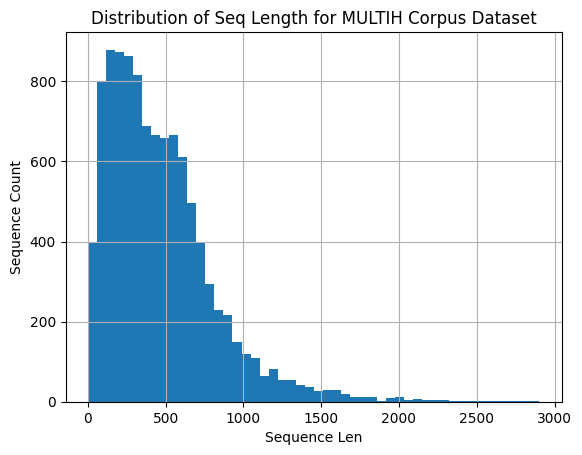

In [79]:
multih_corpus['seq_len'] = multih_corpus['text'].apply(lambda x : len(x.split(' ')))

multih_corpus['seq_len'].hist(bins=50)
plt.xlabel("Sequence Len")
plt.ylabel("Sequence Count")
plt.title("Distribution of Seq Length for MULTIH Corpus Dataset")

In [81]:
multih_query = pd.read_json(multih_query_path, lines=True)
print("Total Queries in MultiH Dataset:", multih_query.shape[0])
multih_query.head()

Total Queries in MultiH Dataset: 974


,_id,title,text
0,q82d4c6ec,,What was the sum of Fourth Quarter without tho...
1,q855a35a0,,In which section is Interest income smaller th...
2,q85384530,,If Total Forward Hedged Revenues develops with...
3,q842c8af2,,what was the ratio of the purchase in december...
4,q85451756,,what is the highest total amount of segment in...


Text(0.5, 1.0, 'Distribution of Seq Length for MULTIH Query Dataset')

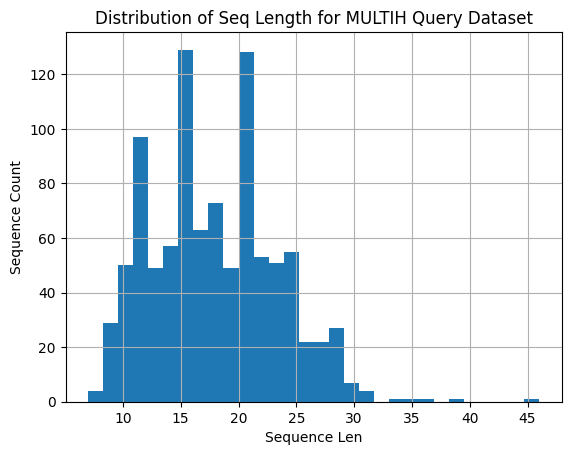

In [82]:
multih_query['seq_len'] = multih_query['text'].apply(lambda x : len(x.split(' ')))
multih_query['seq_len'].hist(bins=30)
plt.xlabel("Sequence Len")
plt.ylabel("Sequence Count")
plt.title("Distribution of Seq Length for MULTIH Query Dataset")

In [83]:
multih_gt = pd.read_csv(multih_tsv_path, sep='\t')
print("Number of Ground Truth Data in MULTIH Bench Dataset:", multih_gt.shape[0])
unique_queries = multih_gt.query_id.unique()
print("Number of Unique Queries:", unique_queries.shape[0])
multih_gt.head()

Number of Ground Truth Data in MULTIH Bench Dataset: 1330
Number of Unique Queries: 292


,query_id,corpus_id,score
0,q8112818c,d81128272,1
1,q8112818c,d811282cc,1
2,q8112818c,d81128380,1
3,q8112818c,d811283ee,1
4,q8112818c,d81128434,1


In [90]:
print(multih_corpus.text.tolist()[500])

Entergy Corporation and Subsidiaries Notes to Financial Statements 106 NOTE 7.
COMMON EQUITY Common Stock Treasury Stock Treasury stock activity for Entergy for 2009, 2008, and 2007 is as follows:
|  | 2009 | 2008 | 2007 |
|  | Treasury |  | Treasury |  | Treasury |  |
|  | Shares | Cost (In Thousands) | Shares | Cost (In Thousands) | Shares | Cost (In Thousands) |
| Beginning Balance, January 1 | 58,815,518 | $4,175,214 | 55,053,847 | $3,734,865 | 45,506,311 | $2,644,390 |
| Repurchases | 7,680,000 | 613,125 | 4,792,299 | 512,351 | 11,581,842 | 1,215,578 |
| Issuances: |  |  |  |  |  |  |
| Employee Stock-BasedCompensation Plans | -856,390 | -60,846 | -1,025,408 | -71,636 | -2,029,686 | -124,801 |
| Directors' Plan | -4,548 | -326 | -5,220 | -366 | -4,620 | -302 |
| Ending Balance, December 31 | 65,634,580 | $4,727,167 | 58,815,518 | $4,175,214 | 55,053,847 | $3,734,865 |
Entergy Corporation reissues treasury shares to meet the requirements of the Stock Plan for Outside Directors (Dir